# Testes de Hipóteses



Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Nesta Aula:
0. Um problema e uma Introdução


1. Etapas Básicas de um Teste


2. Teste de Normalidade


3. Testes Paramétricos


    1. Teste Bicaudal
    2. Teste Unicaudal
    4. Testes para Duas Amostras
    


# <font color="blue">0. Introdução

Uma máquina automática para encher pacotes de café enche-os segundo uma distribuição normal, com média m e variância sempre igual a 400$g^2$, a máquina foi regula para $\mu$ = 500$g$. 

Periodicamente uma amostra de 32 pacotes é recolhida para verificar se a produção está sob controle, isto é $\mu$ = 500g ou não. 

Se uma dessas amostras apresentar média x = 492g, deve-se parar a produção para regular a máquina ou não?

*Retirado de BUSSAB, W. O.; MORETTIN, P. A. Estatística básica. 6. ed.* ← ótimo livro!
    


Você acha que a máquina está desregulada?

### O que podemos fazer nesse caso?

Entram os testes de hipótese!


**A ideia por trás do teste de hipótese então, é calcular a probabilidade do evento observado e descartar a hipótese caso esse evento seja muito raro**

Podemos começar definindo um intervalo de normalidade de operação da máquina: sabemos que ela não é perfeita, mas os pacotes devem ser produzidos seguindo a distribuição normal de média 500$g$ e variância 400$g^2$.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt

**Importação das Bibliotecas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set()

## <font color="blue">1. Etapas Básicas de um Teste</font>
***

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$

> ### <font color='red'>Pontos importantes</font>
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


**No nosso problema temos uma condição normal (comum) e uma hipótese:**
    
$\rightarrow$ condição: máquina está regulada para média=500$g$ e variância=400$g^2$

$\rightarrow$ hipótese inicial: a amostra de 32 sacos veio de uma máquina que está regulada, mesmo tendo média=492g

$\rightarrow$ hipótese alternativa: a amostra de 32 sacos veio de uma máquina desregulada

### **Passo 2** - Escolha da distribuição amostral adequada

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for conhecido, deve-se utilizar a distribuição t de Student.





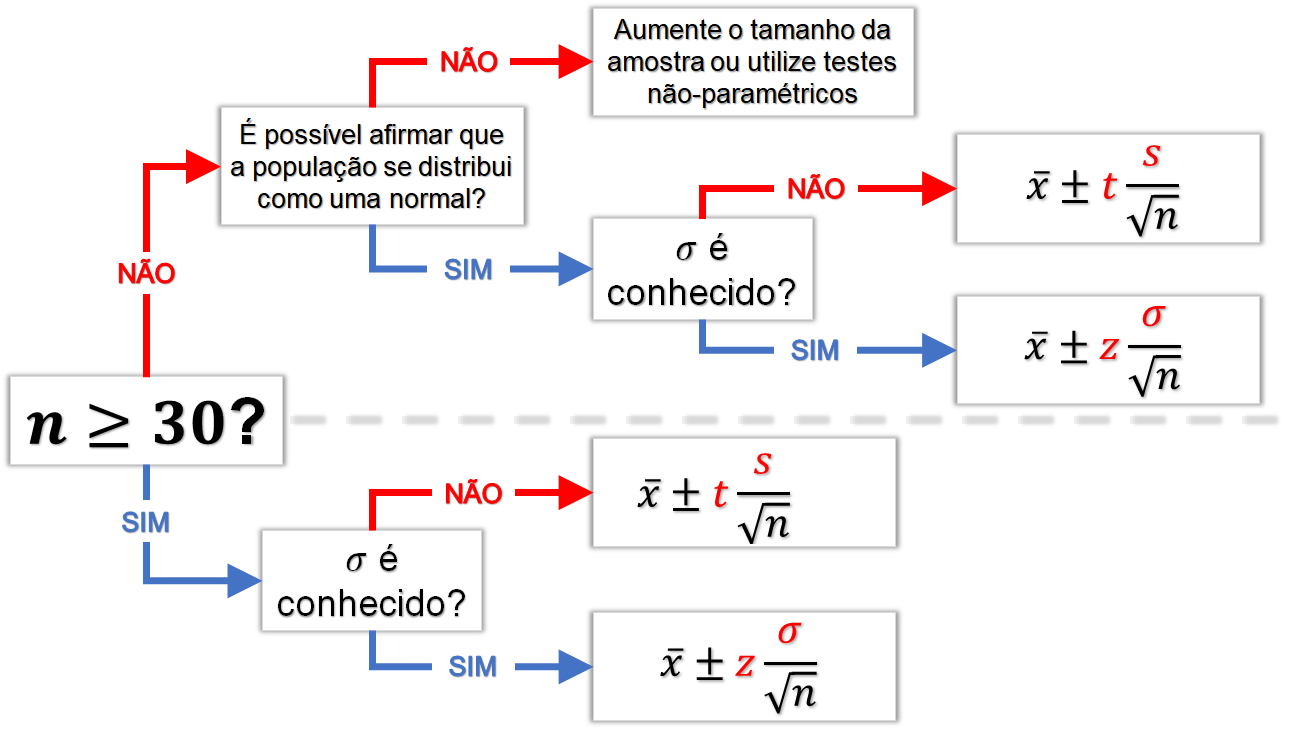

Temos 32 elementos e sabemos o valor de sigma (desvio da população) = 400

O desvio da amostra é dado pelo desvio da população dividio pela raiz de n elementos


(array([  2.,   6.,  16.,  51., 100., 160., 151., 203., 149.,  96.,  45.,
         12.,   6.,   1.,   2.]),
 array([436.54314517, 445.80462934, 455.06611351, 464.32759768,
        473.58908186, 482.85056603, 492.1120502 , 501.37353437,
        510.63501854, 519.89650271, 529.15798688, 538.41947105,
        547.68095522, 556.94243939, 566.20392356, 575.46540773]),
 <BarContainer object of 15 artists>)

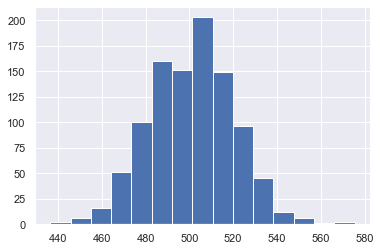

In [118]:
fig, ax = plt.subplots(1, 1)

x = np.random.normal(500, 20, 1000)

ax.hist(x, bins=15)

Pelo gráfico até parece que 492g não está distante de 500g, mas precisamos determinar isso de forma definitiva. 

Desvio da amostra: 3.5355339059327373


(array([  3.,  10.,  22.,  42.,  91., 143., 153., 153., 142., 117.,  58.,
         45.,  18.,   1.,   2.]),
 array([489.17930446, 490.68388572, 492.18846699, 493.69304825,
        495.19762951, 496.70221077, 498.20679204, 499.7113733 ,
        501.21595456, 502.72053583, 504.22511709, 505.72969835,
        507.23427961, 508.73886088, 510.24344214, 511.7480234 ]),
 <BarContainer object of 15 artists>)

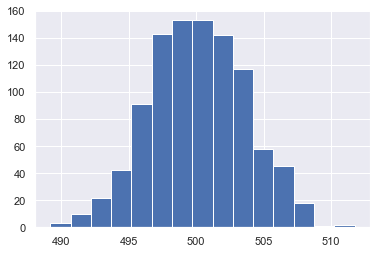

In [119]:
# desvio da amostra = desvio da pop / raiz da amostra

import math

desv = 20 / math.sqrt(32)
print(f'Desvio da amostra: {desv}')

fig, ax = plt.subplots(1, 1)

x = np.random.normal(500, desv, 1000)

ax.hist(x, bins=15)

### **Passo 3** - Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> <img alt="Níveis de Confiança e significância" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png" style="display: block; margin: 25px auto" />
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> <img alt="Áreas de Aceitação e Rejeição" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" style="display: block; margin: 25px auto; border-radius: 10px" />

Vamos usar 5%, isso quer dizer que vamos considerar como resultado "comum", "evento comum", valores de média de amostra que acontecem até 95% das vezes.

Vamos considerar que os valores nos 5% das caudas serão considerados eventos muito raros para nossa amostra e vamos considerar como um sinal de que há algo de errado com a máquina.

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

Relembrando os valores que temos:

média = 500, desvio = 20

média amostra = 492, desvio = 3.53

significância = 5%

H1 do tipo "diferente"

Vamos descobrir o intervalo que determina os 95%:



In [122]:
significancia = 0.05

maximo = norm.ppf(1-significancia/2, loc=500, scale=3.53)
maximo

506.9186728654264

In [125]:
minimo = norm.ppf(significancia/2, loc=500, scale=3.53)
minimo

493.0813271345736

Ou seja:

### O funcionamento normal da máquina deve gerar amostras com média entre 493g e 507g

### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.



## Conclusão: <font color="red">rejeitamos<font color="black"> a hipótese de que a máquina está regulada e devemos ajustá-la!

## <font color="blue">Vamos agora ver mais exemplos de outros casos

## <font color="blue">1. Teste de Normalidade</font>
***

**Carregando nosso dataset**

In [126]:
df = pd.read_csv('PNAD - 2015.csv')

In [127]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<AxesSubplot:xlabel='Renda', ylabel='Count'>

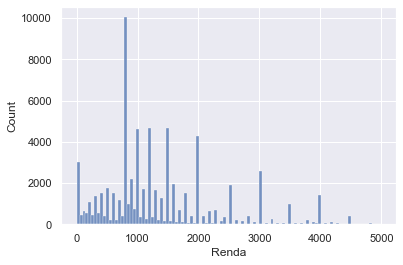

In [130]:
#Não parecem ser normalmente distribuídos
#sns.histplot(df['Renda'])
sns.histplot(df[df['Renda'] < 5000].Renda)

<AxesSubplot:xlabel='Altura', ylabel='Count'>

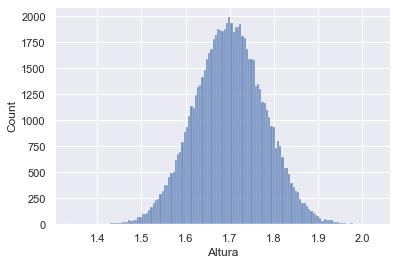

In [132]:
#Parece ser normalmente distribuído
sns.histplot(df['Altura'])

### Importando a biblioteca
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [3]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

- $H_0$: hipótese nula  
- $H_1$: hipótese alternativa

### Definindo a significância do teste ($\alpha$)

In [134]:
confianca = 0.95

In [135]:
significancia = 1 - confianca # 0.05 = 5%

### Testando a variável Renda

In [147]:
normaltest(df['Renda'])
#normaltest(df['Altura'])

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [148]:
# estatística de teste
# p-valor (p-value)
test_stat , pvalue = normaltest(df['Renda'])

In [149]:
test_stat, pvalue

(152380.75803960307, 0.0)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha \, (0,05)$

In [ ]:
# H0: a amostra segue uma distribuição normal
# H1: a amostra NÃO segue uma distribuição normal

In [150]:
if pvalue <= significancia:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Rejeita H0, ou seja, a amostra não segue uma distribuição normal.


### Testando a variável Altura

In [151]:
stat_test, pvalue = normaltest(df['Altura'])

In [152]:
pvalue

0.9049591541967501

In [153]:
if pvalue <= significancia:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Aceita H0, ou seja, a amostra segue uma distribuição normal


### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [154]:
if pvalue <= significancia:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Aceita H0, ou seja, a amostra segue uma distribuição normal


---

## <font color=blue>3. TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

### <font color=blue>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%, com desvio padrão populacional de 4.4?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [155]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [156]:
# Passar para um dataframe
dados = pd.DataFrame({ 'Volume': amostra })

In [157]:
dados.head()

,Volume
0,509
1,505
2,495
3,510
4,496


In [158]:
dados.shape

(50, 1)

In [159]:
# Média da amostra
media_amostra = dados['Volume'].mean()
media_amostra

503.24

In [164]:
# Desvio padrão amostral
desvio_amostra = dados['Volume'].std()
desvio_amostra

4.483803050527348

In [168]:
# definindo os demais dados do problema

u0 = 500 # 500 ml
n = len(amostra)
sigma = 4.4 #desvio padrão populacional
u0, n, sigma

(500, 50, 4.4)

(array([  2.,   3.,  14.,  32.,  62.,  93., 128., 175., 139., 133.,  97.,
         69.,  28.,  15.,  10.]),
 array([498.01307837, 498.26164557, 498.51021276, 498.75877996,
        499.00734716, 499.25591436, 499.50448155, 499.75304875,
        500.00161595, 500.25018315, 500.49875034, 500.74731754,
        500.99588474, 501.24445193, 501.49301913, 501.74158633]),
 <BarContainer object of 15 artists>)

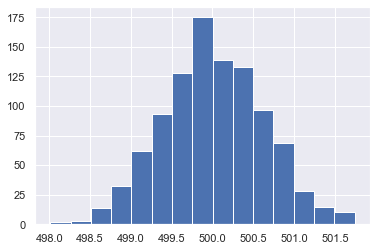

In [169]:
fig, ax = plt.subplots(1, 1)

desvio_amostra = dados['Volume'].std() #4.48

x = np.random.normal(500, desvio_amostra / math.sqrt(50), 1000)

ax.hist(x, bins=15)

(array([  5.,  38.,  82., 178., 242., 228., 150.,  52.,  19.,   6.]),
 array([-2.98026097, -2.35839301, -1.73652504, -1.11465708, -0.49278911,
         0.12907885,  0.75094682,  1.37281478,  1.99468275,  2.61655071,
         3.23841868]),
 <BarContainer object of 10 artists>)

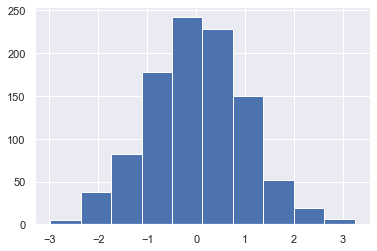

In [170]:
fig, ax = plt.subplots(1, 1)

desvio_amostra = 4.48380305052735
sigma = 4.4

x = np.random.normal(500, sigma / math.sqrt(50), 1000)

z = (x - 500)/(sigma / math.sqrt(50))

ax.hist(z)

In [171]:
z = (503.24- 500)/(sigma / math.sqrt(50))
z

5.206877206919137

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500 \, ml$

### $H_1: \mu \neq 500 \, ml$ 

---

### **Passo 2** - escolha da distribuição amostral adequada



![](teste_hipotese_imagem.png)

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [172]:
alpha = 0.05

In [173]:
confianca = 1 - alpha

### Obtendo $z_{\alpha/2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [177]:
z_critico = norm.isf(alpha / 2)
z_critico

1.9599639845400545

<img style="border-radius: 10px" alt="Região de Aceitação" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png" />

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [176]:
z = (media_amostra - u0) / (desvio_amostra / np.sqrt(n))  # estatística de teste

#z = (media_amostra - u0) / (sigma / np.sqrt(n))  # estatística de teste
z

5.109559775991873

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=100%>

### <font color='green'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [179]:
z <= -z_critico or z >= z_critico

True

### <font color='orange'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='green'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [180]:
pvalue = norm.sf(z) * 2

In [181]:
pvalue

3.229103172445772e-07

In [182]:
pvalue <= significancia # Reijeita H0

True

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [183]:
from statsmodels.stats.weightstats import ztest

In [184]:
ztest(x1=dados['Volume'], value=u0)

(5.109559775991873, 3.229103172445772e-07)

In [185]:
u0

500

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [66]:
from statsmodels.stats.weightstats import DescrStatsW

In [186]:
teste = DescrStatsW(dados['Volume'])

In [187]:
teste

In [188]:
teste.ztest_mean(value=u0)

(5.109559775991874, 3.2291031724457596e-07)

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

In [ ]:
# Unicaudal
# 25 latas < 30: t-Student

### 3.2.1. Conhecendo a Distribuição $t$-student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

### Propriedades

- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

In [4]:
from scipy.stats import t

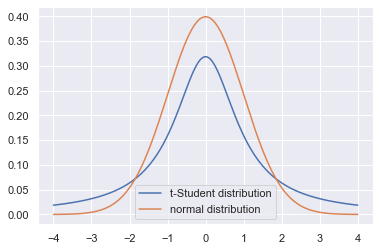

In [5]:
x = np.linspace(-4,4,10000)
y = t.pdf(x = x, df = 1)
yn = norm.pdf(x)

plt.plot(x,y, label = 't-Student distribution')
plt.plot(x, yn, label = 'normal distribution')

plt.legend()

---

#### Tabela t de Student
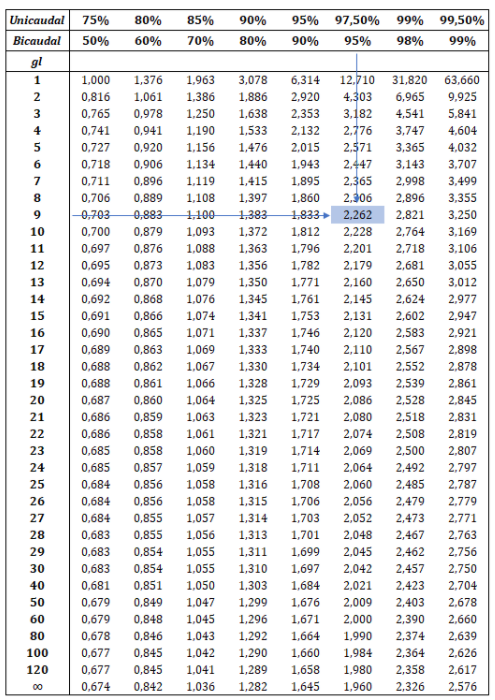

### 3.2.2. Teste Unicaudal

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [195]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [190]:
len(amostra)

25

In [191]:
# Converter para um DataFrame
dados = pd.DataFrame({ 'gramas': amostra })

In [192]:
dados.head()

,gramas
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49


In [251]:
# Visualização
#plt.hist(dados)
#sns.histplot(dados)

In [202]:
#Vericando a normalidade
normaltest(dados)

NormaltestResult(statistic=array([3.09493178]), pvalue=array([0.21278652]))

In [203]:
# media amostral
media_amostra = dados['gramas'].mean()
media_amostra

36.250400000000006

In [197]:
# desvio padrão amostral
desvio_amostra = dados['gramas'].std()

In [198]:
desvio_amostra

0.9667535018469453

In [210]:
# número de amostras e número de graus de liberdade
n = 25
graus_de_liberdade = n - 1
u0 = 37

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37 \, g$

### $H_1: \mu > 37 \, g$

---

### **Passo 2** - escolha da distribuição amostral adequada

![](teste_hipotese_imagem.png)

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - Fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [204]:
significancia = 0.05

In [205]:
confianca = 1 - significancia

### Obtendo $t_{\alpha}$

In [206]:
from scipy.stats import t as t_student

In [207]:
confianca

0.95

In [211]:
t_alpha = t_student.ppf(confianca, df=graus_de_liberdade)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [212]:
t = (media_amostra - u0) / (desvio_amostra / np.sqrt(n))
t

-3.876893119952045

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

In [213]:
u0, media_amostra

(37, 36.250400000000006)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [214]:
t, t_alpha

(-3.876893119952045, 1.7108820799094275)

In [215]:
t >= t_alpha

False

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do $p$ valor</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [216]:
pvalue = t_student.sf(t, df=graus_de_liberdade)
pvalue

0.999640617030382

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [217]:
teste = DescrStatsW(dados['gramas'])

In [ ]:
# ztest_mean: Distribuição Normal
# ttest_mean: Distribuição t-Student

In [218]:
teste.ttest_mean(value=u0, alternative='larger')

(-3.876893119952081, 0.9996406170303819, 24.0)

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [219]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [220]:
df[df['Sexo'] == 0]['Renda']

0         800
3        3500
6        3150
9        1150
13       2000
         ... 
76833    1900
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 53250, dtype: int64

In [221]:
homens = df[df['Sexo'] == 0]['Renda'].sample(n=500, random_state=101)
homens.head()

26241     300
65579    1000
58984    4000
65931    5000
25501     300
Name: Renda, dtype: int64

In [222]:
mulheres = df[df['Sexo'] == 1]['Renda'].sample(n=500, random_state=101)
mulheres.head()

10179     788
43943    1200
75223    6000
33243    1000
5189      788
Name: Renda, dtype: int64

### Obtendo dados do problema

- Média e desvio padrão das mulheres
- Média e desvio padrão dos homens
- Número de amostras (homens e mulheres)
- Nível de significância e confiança

In [223]:
u1 = homens.mean()    # média dos homens (renda)
u2 = mulheres.mean()  # média das mulheres (renda)

u1, u2

(2142.608, 1357.528)

In [224]:
s1 = homens.std()    # desvio padrão amostral dos homens (renda)
s2 = mulheres.std()  # desvio padrão amostral das mulheres (renda)

s1, s2

(2548.050802499875, 1569.9011907484578)

In [225]:
# Quantidade de elementos de cada amostra
nH = 500
nM = 500

In [226]:
significancia = 0.01
confianca = 0.99

In [227]:
D0 = 0 # termo constante isolado na formulação das hipóteses

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

![](teste_hipotese_imagem.png)
### <font color='red'><strong>Observação importante</strong></font>

> **Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$**

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [228]:
significancia = 0.01
confianca = 1 - significancia

### Diferenças entre `ppf`, `cdf` e `sf`

1. `ppf`: **passamos um valor de probabilidade** e ele **retorna um valor no eixo** `z` (norm) ou `t` (t_student).
    - Quando estamos com uma Normal/t-Student bicaudal, então, passamos $\beta + \alpha / 2$
    - Quando estamos com uma Normal/t-Student unicaudal à esquerda (confiança), então, passamos somente o $\beta$
    - Quando estamos com uma Normal/t-Student unicaudal à direita (confiança), então, passamos somente o $\alpha$
2. `cdf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à esqueda do valor passado como parâmetro.
3. `sf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à direita do valor passado como parâmetro.

#### Legenda
- $\beta$: confiança
- $\alpha$: significância

In [229]:
z_alpha = norm.ppf(confianca)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [230]:
numerador = (u1 - u2) - D0
denominador = np.sqrt((s1**2 / nH) + (s2**2 / nM))

In [231]:
z = numerador / denominador
z

5.86562005776475

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [232]:
z >= z_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [233]:
pvalue = norm.sf(z)
pvalue

2.2372867859458743e-09

In [234]:
pvalue <= significancia

True

### Facilitando os cálculos com o Python
---

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html

In [235]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [236]:
teste_homens = DescrStatsW(homens)
teste_mulheres = DescrStatsW(mulheres)

**Utilizando o CompareMeans**

In [237]:
teste = CompareMeans(teste_homens, teste_mulheres)

In [238]:
teste

In [239]:
D0

0

In [240]:
teste.ztest_ind(value=D0, alternative='larger')

(5.8656200577647555, 2.2372867859458094e-09)

---